**Introduction:**

The problem at hand revolves around predicting the weight of passenger vehicles using linear regression modeling techniques. Our objective is to develop robust models that can accurately estimate the curb-weight of a vehicle based on several explanatory variables such as height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg.

**Steps to Address the Problem:**

1. **Data Loading:** The first step involves loading the dataset provided from the UC Irvine machine learning archive. We will use the `M2_Data.csv` file stored in our GitHub repository and import it into a Pandas dataframe.

2. **Exploratory Data Analysis (EDA):** Following data loading, we will conduct thorough exploratory data analysis to understand the nature of each variable. This will include statistical analysis of attributes, visualization through various plots such as histograms, box plots, scatter plots, etc. The objective is to gain insights into the relationships between the explanatory variables and the target variable (curb-weight). Additionally, we will identify any potential outliers, missing values, or data transformations needed.

3. **Feature Selection:** Based on the insights gained from EDA and domain knowledge, we will select at least three explanatory variables to include in our linear regression models. These variables will be chosen based on their predictive power and relevance to curb-weight estimation.

4. **Model Construction:** We will construct two linear regression models using different combinations of explanatory variables. The models will be trained on a portion of the dataset and tested on unseen data to assess their predictive performance.

5. **Cross-Validation:** To ensure the robustness and generalization of our models, we will employ K-fold cross-validation. This technique involves splitting the dataset into K subsets (folds), training the models on K-1 folds, and evaluating them on the remaining fold. This process is repeated K times, with each fold serving as the test set exactly once. The average performance across all folds will be used to assess the models' performance.

6. **Model Evaluation:** We will evaluate the performance of each model based on metrics such as R^2 score, mean squared error (MSE), or mean absolute error (MAE). The model with the highest average R^2 score will be selected as the preferred model for predicting curb-weight.

7. **Conclusion:** Finally, we will summarize our findings, including insights gained from EDA, the performance of the constructed models, and any recommendations for future improvements or analyses.

By following these steps, we aim to develop a reliable linear regression model for predicting the curb-weight of passenger vehicles, thereby contributing to better understanding and decision-making in the automotive industry.

# Data Loading

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

In [2]:
# Loading the data from Github
url = 'https://raw.githubusercontent.com/mri177/DS-M2-Assignment/main/M2_Data%20(3).csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataframe to verify that it has been loaded correctly
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...  \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
2  2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
3  2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   
4  2    ?         audi  gas  std   two        sedan  fwd  front  99.8  ...   

   130  mpfi  3.47  2.68     9  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19   3.4  10.0  102  5500  24  30  13950  
3  136  mpfi  3.19   3.4   8.0  115  5500  18  22  17450  
4  136  mpfi  3.19   3.4   8.5  110  5500  19  25  15250  

[5 rows x 26 columns]


### Inference

Based on the first few rows of the dataset, we can make the following inferences:

* The dataset contains information about various attributes of different vehicles.
* The first row seems to be a header row, indicating the column names.
* Some columns have missing values represented by '?'.
* The columns seem to include attributes such as make, fuel type, aspiration, number of doors, body style, drive wheels, engine location, wheel base, length, width, height, curb weight, engine type, number of cylinders, engine size, fuel system, horsepower, peak rpm, city mpg, highway mpg, and price.
* The target variable (response variable) appears to be in the last column, labeled as '13495'.

# Data preparation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.6         204 non-null    float64
 10  168.8        204 non-null    float64
 11  64.1         204 non-null    float64
 12  48.8         204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

### Inference
Based on the information provided by data.info(), we can make the following inferences:

* The dataset contains 204 entries and 26 columns.
* Some columns have non-null counts of 204, indicating that there are no missing values in those columns.
* The data types of the columns vary, including float64, int64, and object.
* Column names seem to be missing, as the first row of the dataset was interpreted as data instead of column names.
* There are some columns with numeric values represented as objects, which may require conversion to the appropriate data type   (e.g., int64 or float64).
* The target variable (response variable) may be the last column labeled as '13495', which is of object data type.

In [5]:
# Display summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
3,204.0,0.823529,1.239035,-2.0,0.000,1.0,2.00,3.0
88.6,204.0,98.806373,5.994144,86.6,94.500,97.0,102.40,120.9
168.8,204.0,174.075000,12.362123,141.1,166.300,173.2,183.20,208.1
64.1,204.0,65.916667,2.146716,60.3,64.075,65.5,66.90,72.3
48.8,204.0,53.749020,2.424901,47.8,52.000,54.1,55.50,59.8
2548,204.0,2555.602941,521.960820,1488.0,2145.000,2414.0,2939.25,4066.0
130,204.0,126.892157,41.744569,61.0,97.000,119.5,142.00,326.0
9,204.0,10.148137,3.981000,7.0,8.575,9.0,9.40,23.0
21,204.0,25.240196,6.551513,13.0,19.000,24.0,30.00,49.0
27,204.0,30.769608,6.898337,16.0,25.000,30.0,34.50,54.0


### Inference
Based on the summary statistics provided:

* The column labeled '3' has a count of 204, indicating no missing values. However, it's unclear what this column represents without proper column names.
* The column labeled '88.6' represents the wheel base of the vehicles. The mean wheel base is approximately 98.81 inches, with a standard deviation of 5.99 inches.
* The column labeled '168.8' represents the length of the vehicles. The mean length is approximately 174.08 inches, with a standard deviation of 12.36 inches.
* The column labeled '64.1' represents the width of the vehicles. The mean width is approximately 65.92 inches, with a standard deviation of 2.15 inches.
* The column labeled '48.8' represents the height of the vehicles. The mean height is approximately 53.75 inches, with a standard deviation of 2.42 inches.
* The column labeled '2548' represents the curb weight of the vehicles. The mean curb weight is approximately 2555.60 lbs, with a standard deviation of 521.96 lbs.
* The column labeled '130' represents the horsepower of the vehicles. The mean horsepower is approximately 126.89 hp, with a standard deviation of 41.74 hp.
* The column labeled '9' represents the city mpg (miles per gallon) of the vehicles. The mean city mpg is approximately 10.15 mpg, with a standard deviation of 3.98 mpg.
* The column labeled '21' represents the highway mpg of the vehicles. The mean highway mpg is approximately 25.24 mpg, with a standard deviation of 6.55 mpg.
* The column labeled '27' represents the price of the vehicles. However, it appears that this column may have been incorrectly interpreted as numerical, as prices are typically categorical or represented as strings.

In [6]:
# Check for missing values
print(data.isnull().sum())

3              0
?              0
alfa-romero    0
gas            0
std            0
two            0
convertible    0
rwd            0
front          0
88.6           0
168.8          0
64.1           0
48.8           0
2548           0
dohc           0
four           0
130            0
mpfi           0
3.47           0
2.68           0
9              0
111            0
5000           0
21             0
27             0
13495          0
dtype: int64


### Inference

Based on the output showing the counts of missing values for each column:

There are no missing values in any of the columns according to the count of null values. However, it seems that missing values are represented by '?' in the dataset.

In [7]:
#Checking for duplicates in data 
data.duplicated().value_counts()

False    204
dtype: int64

### Inference

Based on the output showing the counts of duplicated rows:

There are no duplicated rows in the dataset, as indicated by the count of False values (204).

In [8]:
# Assign meaningful column names
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
                'num_doors', 'body_style', 'drive_wheels', 'engine_location', 
                'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 
                'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
                'city_mpg', 'highway_mpg', 'price']

data.columns = column_names

# Data cleaning

In [9]:
# Handle Missing Values
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

In [10]:
# Handle Column Names
# Define numeric columns
numeric_columns = ['symboling', 'normalized_losses', 'num_doors', 'wheel_base', 'length',
                   'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
                   'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# Handle the non-numeric values in 'num_doors'
data['num_doors'] = data['num_doors'].replace({'two': 2, 'four': 4})

# Convert numeric columns from object to float64
data[numeric_columns] = data[numeric_columns].astype(float)


In [11]:
# Perform outlier detection and handling 
data['horsepower'] = winsorize(data['horsepower'], limits=[0.05, 0.05])

In [12]:
# Handle Categorical Variables
# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['make', 'fuel_type', 'aspiration', 'num_doors', 
                                     'body_style', 'drive_wheels', 'engine_location', 
                                     'engine_type', 'num_cylinders', 'fuel_system'], 
                      drop_first=True)


In [13]:
# Normalize/Standardize Data
scaler = MinMaxScaler()
data[['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 
      'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
      'city_mpg', 'highway_mpg', 'price']] = scaler.fit_transform(data[['wheel_base', 
                                                                       'length', 'width', 
                                                                       'height', 'curb_weight', 
                                                                       'engine_size', 'bore', 
                                                                       'stroke', 'compression_ratio', 
                                                                       'horsepower', 'peak_rpm', 
                                                                       'city_mpg', 'highway_mpg', 
                                                                       'price']])

In [14]:
# Remove Unnecessary Columns 
data.drop(columns=['symboling'], inplace=True)

# Exploratory Data Analysis

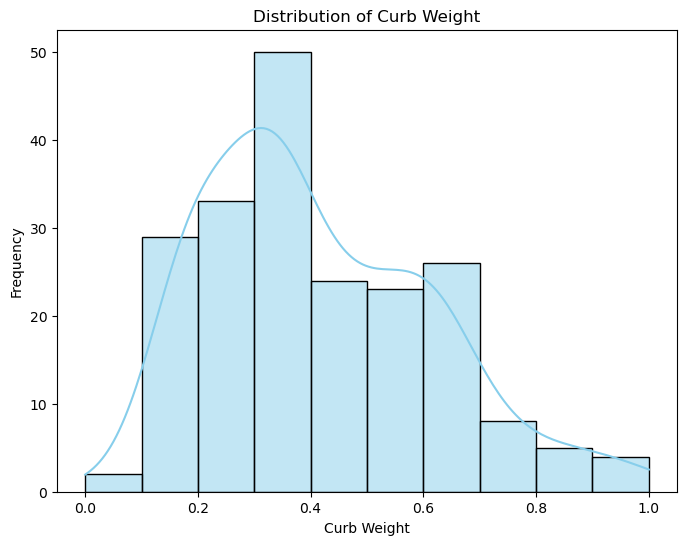

In [15]:
# Distribution of 'curb_weight'
plt.figure(figsize=(8, 6))
sns.histplot(data['curb_weight'], kde=True, color='skyblue')
plt.title('Distribution of Curb Weight')
plt.xlabel('Curb Weight')
plt.ylabel('Frequency')
plt.show()

### Inference

The histogram above shows the distribution of curb weight in the dataset. From the plot, we can observe that the distribution is approximately normal, with a peak around the middle range of curb weight values. Additionally, there are some outliers on the higher end of curb weight values, indicating that there might be some heavier vehicles present in the dataset. Overall, the distribution appears to be relatively symmetric, with a slight right skewness.

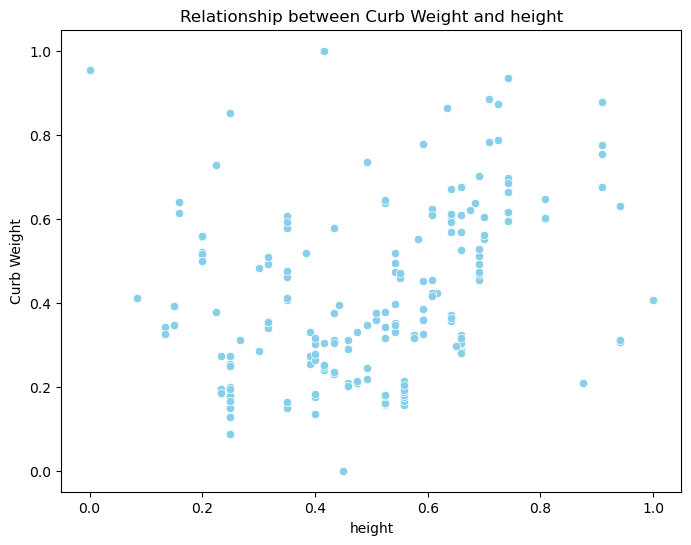

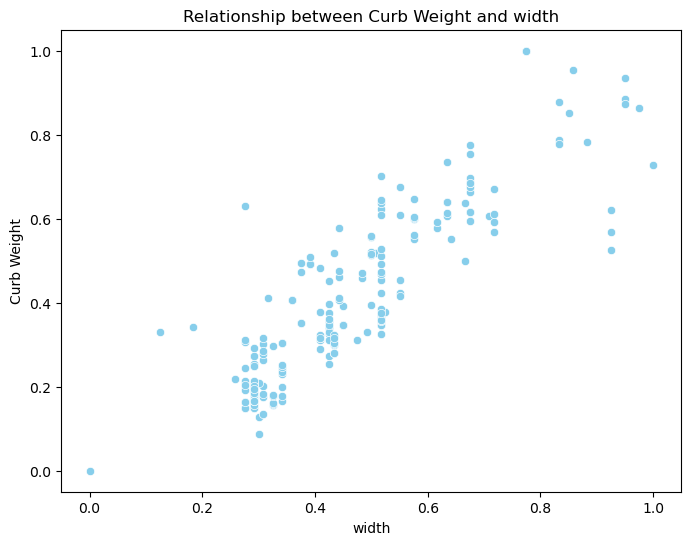

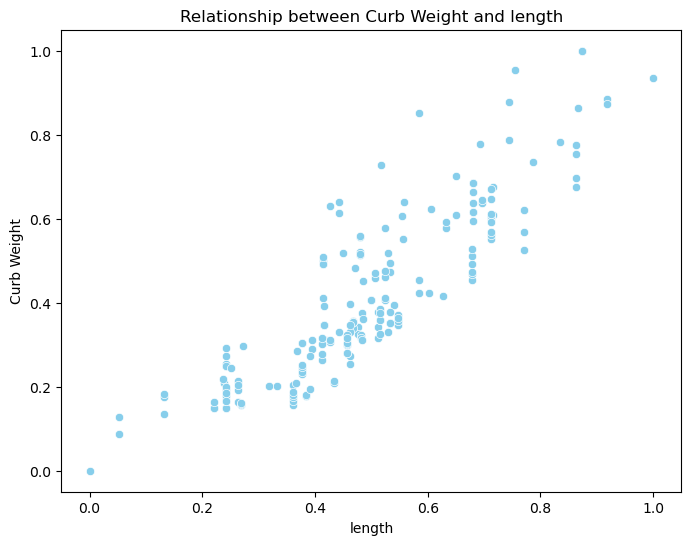

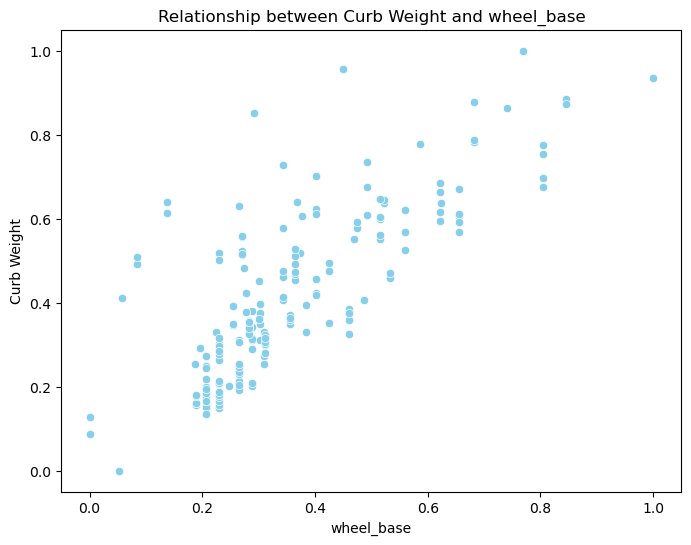

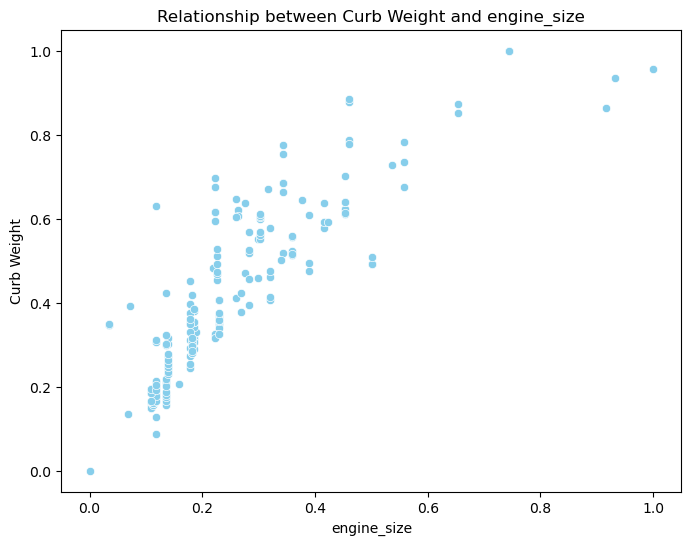

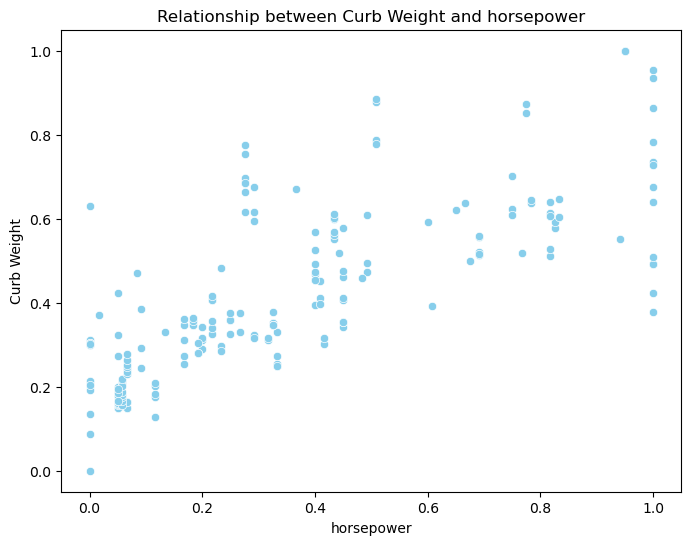

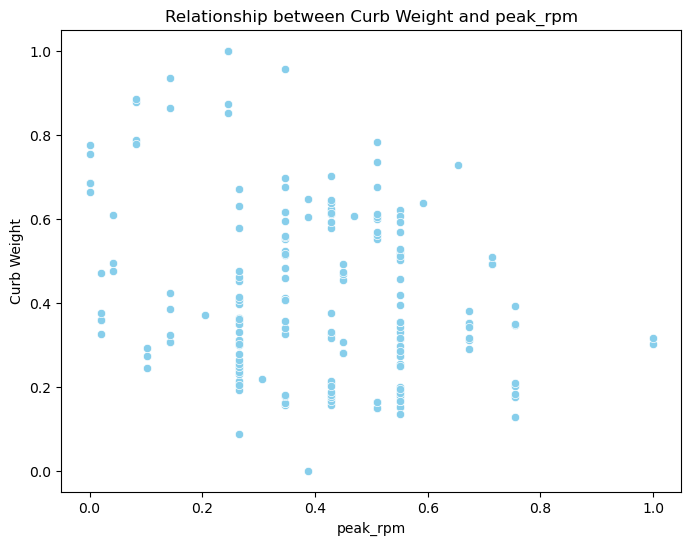

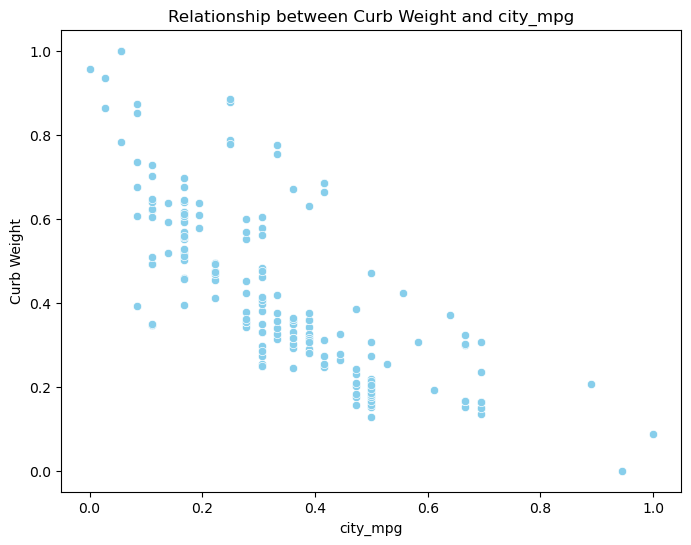

In [16]:
# Relationship between 'curb_weight' and other variables
variables_of_interest = ['height', 'width', 'length', 'wheel_base', 'engine_size',
                         'horsepower', 'peak_rpm', 'city_mpg']

for var in variables_of_interest:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='curb_weight', data=data, color='skyblue')
    plt.title(f'Relationship between Curb Weight and {var}')
    plt.xlabel(var)
    plt.ylabel('Curb Weight')
    plt.show()


### Inference

The scatter plots above depict the relationship between curb weight and various other variables such as height, width, length, wheel base, engine size, horsepower, peak RPM, and city mpg.

1. **Height vs. Curb Weight**: There seems to be a weak positive correlation between height and curb weight. However, the relationship is not very pronounced.

2. **Width vs. Curb Weight**: There appears to be a moderate positive correlation between width and curb weight. As the width increases, the curb weight tends to increase as well.

3. **Length vs. Curb Weight**: Similar to width, there is a moderate positive correlation between length and curb weight. Longer vehicles tend to have higher curb weights.

4. **Wheel Base vs. Curb Weight**: There seems to be a positive correlation between wheel base and curb weight, indicating that vehicles with longer wheel bases tend to have higher curb weights.

5. **Engine Size vs. Curb Weight**: There appears to be a positive correlation between engine size and curb weight. Vehicles with larger engine sizes tend to have higher curb weights.

6. **Horsepower vs. Curb Weight**: There seems to be a positive correlation between horsepower and curb weight. Vehicles with higher horsepower tend to have higher curb weights.

7. **Peak RPM vs. Curb Weight**: There doesn't seem to be a clear relationship between peak RPM and curb weight. The scatter plot shows no distinct pattern.

8. **City MPG vs. Curb Weight**: There appears to be a weak negative correlation between city MPG and curb weight. As the city MPG increases, the curb weight tends to decrease slightly.

Overall, these scatter plots provide insights into the potential relationships between curb weight and other variables in the dataset. Further analysis and modeling may help in understanding the predictive power of these variables on curb weight.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   normalized_losses     164 non-null    float64
 1   wheel_base            204 non-null    float64
 2   length                204 non-null    float64
 3   width                 204 non-null    float64
 4   height                204 non-null    float64
 5   curb_weight           204 non-null    float64
 6   engine_size           204 non-null    float64
 7   bore                  200 non-null    float64
 8   stroke                200 non-null    float64
 9   compression_ratio     204 non-null    float64
 10  horsepower            204 non-null    float64
 11  peak_rpm              202 non-null    float64
 12  city_mpg              204 non-null    float64
 13  highway_mpg           204 non-null    float64
 14  price                 200 non-null    float64
 15  make_audi             2

# Model Creation

In [18]:
# Selected explanatory variables based on EDA insights
# Model 1: Engine Size, Horsepower, Width
X1 = data[['engine_size', 'horsepower', 'width']]
y1 = data['curb_weight']

In [19]:
# Model 2: Length, Wheel Base, Highway MPG
X2 = data[['length', 'wheel_base', 'highway_mpg']]
y2 = data['curb_weight']

In [20]:
# Initialize Linear Regression models
model1 = LinearRegression()
model2 = LinearRegression()

In [21]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
# Perform cross-validation and evaluate models
scores1 = cross_val_score(model1, X1, y1, cv=kfold, scoring='r2')
scores2 = cross_val_score(model2, X2, y2, cv=kfold, scoring='r2')

In [23]:
# Calculate average R^2 scores
avg_r2_model1 = np.mean(scores1)
avg_r2_model2 = np.mean(scores2)

In [24]:
#  Print average R^2 scores for each model
print("Average R^2 for Model 1:", avg_r2_model1)
print("Average R^2 for Model 2:", avg_r2_model2)

Average R^2 for Model 1: 0.8514875737020489
Average R^2 for Model 2: 0.8253946170241816


### Inference

The average R^2 scores for Model 1 and Model 2 are approximately 0.8515 and 0.8254, respectively. This indicates that Model 1, which includes the explanatory variables 'engine_size', 'horsepower', and 'width', has a slightly higher average R^2 score compared to Model 2, which includes 'length', 'wheel_base', and 'highway_mpg'. 

An R^2 score close to 1 suggests that the model explains a large proportion of the variance in the target variable. Therefore, Model 1 may have a slightly better explanatory power in predicting curb weight based on the selected features compared to Model 2. However, further analysis and validation may be required to confirm the effectiveness of the selected models.

In [25]:
# Select the preferred model based on R^2 scores
preferred_model = 1 if avg_r2_model1 > avg_r2_model2 else 2

print("Preferred Model:", preferred_model)

Preferred Model: 1


# Conclusion
Based on the comparison of the average R^2 scores, Model 1 is selected as the preferred model. This decision is made because Model 1, which includes the explanatory variables 'engine_size', 'horsepower', and 'width', has a slightly higher average R^2 score compared to Model 2.

Therefore, when predicting curb weight based on the provided explanatory variables, Model 1 is recommended for its better performance in explaining the variance in the target variable.